In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import csv

In [ ]:
data =[]
with open(r"C:\Users\Lenovo\Downloads\MER_T07_02A-2020-02-03.csv",'r') as csvfile:
    file_reader = csv.reader(csvfile,delimiter=',')
    for row in file_reader:
        data.append(row)
data = np.array(data)        


1. Explore the important attributes like dimension,shape, data type etc, of the array formed
above.


In [ ]:
print("Dimension of array formed above is:", data.ndim)
print("Shape of array formed above is:", data.shape)
print("Datatype of array formed above is:", data.dtype.type)

2. Print the data contained in the first 10 rows of the 4th column

In [ ]:
print(data[0:9,[4]])

3. Which row serves as the headers/titles for all the columns.


In [ ]:
print(data[0,0:6])

4. Print the data contained in column 2 and 3 from row 1 till row 20

In [ ]:
print(data[0:20,1:3])

5. Print the data present in only the first three and the last three rows of all the columns in a
single output

In [ ]:
print("First and last three rows are \n" , np.vstack((data[:3,:],data[:-3,:])))

6. Sort the data on the basis of net amount of electricity generated irrespective of the
source.

In [ ]:
mask = (data[:,2]!= 'Not Available')
value = data[mask]
np.sort(value[1:,2:3].astype(float))

7. Find the total amount of electricity generated using coal and nuclear between
1949-1990.( In this dataset, rows containing monthly data express date in the format
'YYYYMM'. Rows containing annual data express the date in the format 'YYYY13'.)

In [22]:
hr=data[1:]
cond_time=np.mod(hr[:,1].astype(int),100)==13
data_annual=hr[cond_time]

In [ ]:
c1990=data_annual[:,1].astype(int)<=199013
data1990=data_annual[c1990]


In [ ]:
cond_coal=data1990[:,4]=='Electricity Net Generation From Coal, All Sectors'
coal=data1990[cond_coal]

In [ ]:
cond_nucl=data1990[:,4]=='Electricity Net Generation From Nuclear Electric Power, All Sectors'
nuclear=data1990[cond_nucl]

In [ ]:
final=np.vstack((coal,nuclear))


In [ ]:
print("Total amount of electricity generated using coal and nuclear between 1949-1990:",np.sum(final[:,2].astype(float)),"Million Kilowatthours")

8. Print all the unique sources of Energy generation present in the dataset.

In [ ]:
source = hr[:,4]
unique_source=np.unique(source)
print('All the unique source of energy genration present in the dataset are:',unique_source )

9. Print all the details(annual) where the energy source is Wind Energy. Use the concept of
masking to filter the data.

In [66]:
mask = (data[:, 4] == 'Electricity Net Generation From Wind, All Sectors')
w_data=data[mask]
w_value=w_data[1:,2]
w_energy = np.where(w_value == 'Not Available', np.nan, w_value)
total_wind = np.nansum(w_energy.astype(float))
print("Total (annual) energy generated with wind is:",total_wind, "Million Kilowatthours")


Total (annual) energy generated with wind is: 4127861.363 Million Kilowatthours


10. Print the Total Energy generated in the USA till date.

In [67]:
energy_values = data[1:, 2]
energy_values = np.where(energy_values == 'Not Available', np.nan, energy_values)
total_energy = np.nansum(energy_values.astype(float))
print("Total energy generated in the USA till date:", total_energy, "Million Kilowatthours")


Total energy generated in the USA till date: 642969289.5169998 Million Kilowatthours


13. Plot the above data to find if the energy production in the USA has increased in the last
10 years.

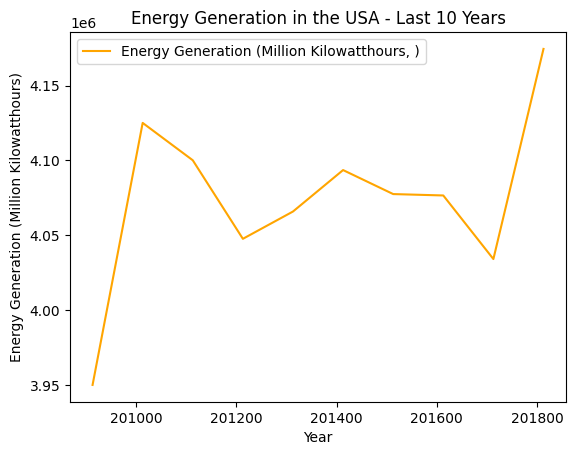

In [102]:
last_10_years = data_annual[-10:, :]
years = last_10_years[:, 1].astype(int)
energy_generation = last_10_years[:, 2].astype(float)

plt.plot(years, energy_generation, label="Energy Generation (Million Kilowatthours, )",color='orange')
plt.xlabel("Year")
plt.ylabel("Energy Generation (Million Kilowatthours)")
plt.title("Energy Generation in the USA - Last 10 Years")
plt.legend()
plt.show()
